In [2]:
%cd F:\My_projects\Learning\Python_imageProcessing

F:\My_projects\Learning\Python_imageProcessing


f:\My_projects\Learning\Python_imageProcessing\venv3.9\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### smoothing filter

image shape:  (384, 612)
[[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]


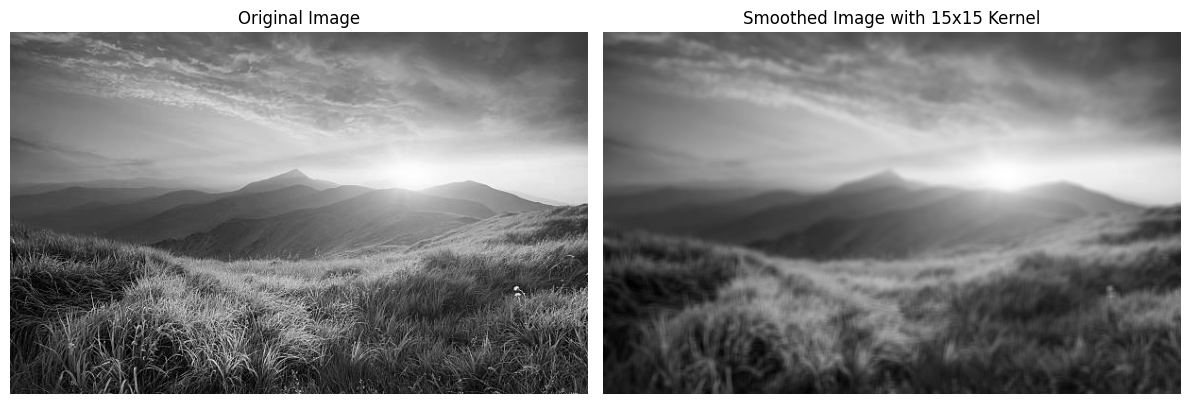

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)
print("image shape: ",image.shape)
kernel = np.ones((6,6), np.float32) / 36.0 # stander is 36, brightness 
print(kernel)

# Apply the smoothing filter
smoothed_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image with 15x15 Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


image shape:  (384, 612)
[[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]


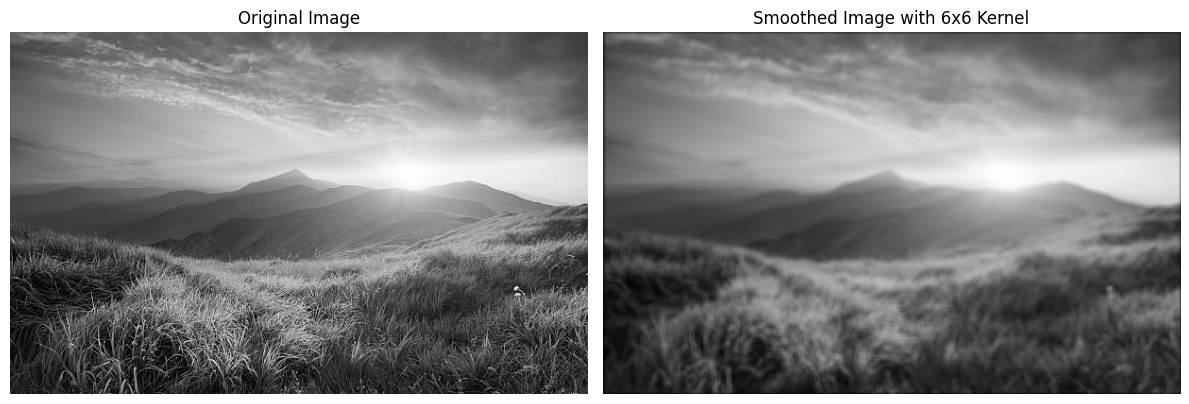

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load the image
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)
print("image shape: ", image.shape)

# Define the kernel
kernel = np.ones((6, 6), np.float32) / 36.0  # standard is 36, brightness
print(kernel)

# Apply the smoothing filter using scipy's convolve2d
smoothed_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

# Convert the result to uint8 type
smoothed_image = np.uint8(smoothed_image)

# Display the original and smoothed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image with 6x6 Kernel')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# the cv2.filter2D function is typically used for convolution operations on images. 

### Edge Detection

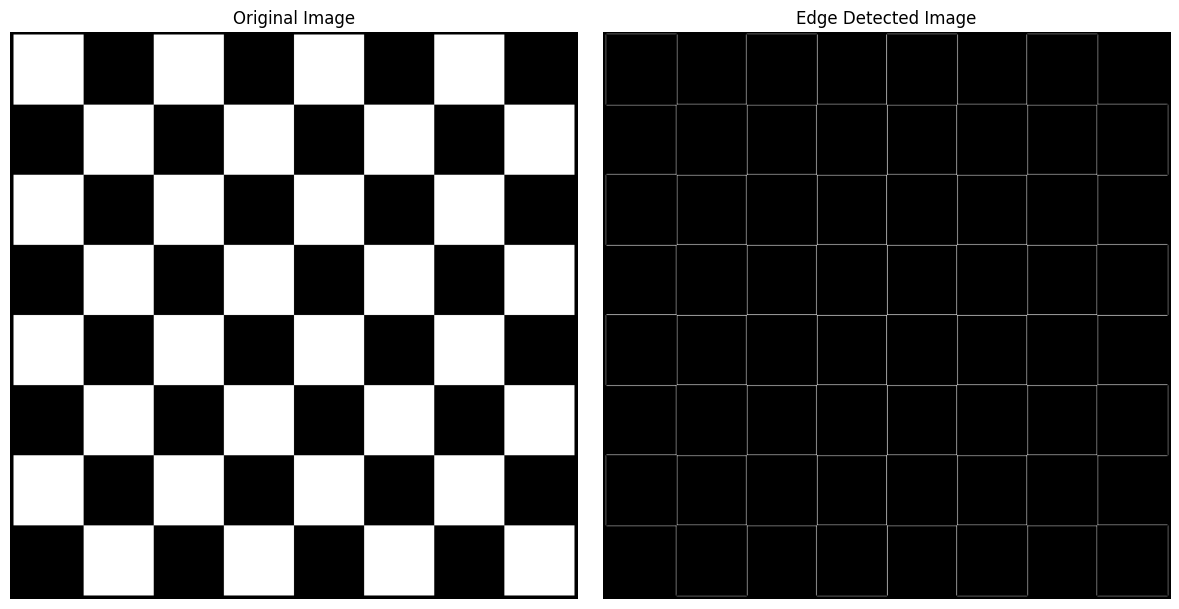

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Chess.png', cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]], dtype=np.float32)

# Apply the Laplacian kernel to detect edges
edges = cv2.filter2D(image, -1, laplacian_kernel) 

# absolute value 

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# matric =[0, 1, 0; 1, -4, 1; 0, 1, 0]
# This kernel is known as the Laplacian kernel and is used to highlight regions of rapid intensity change, 
# which correspond to edges.

### sharpening filter

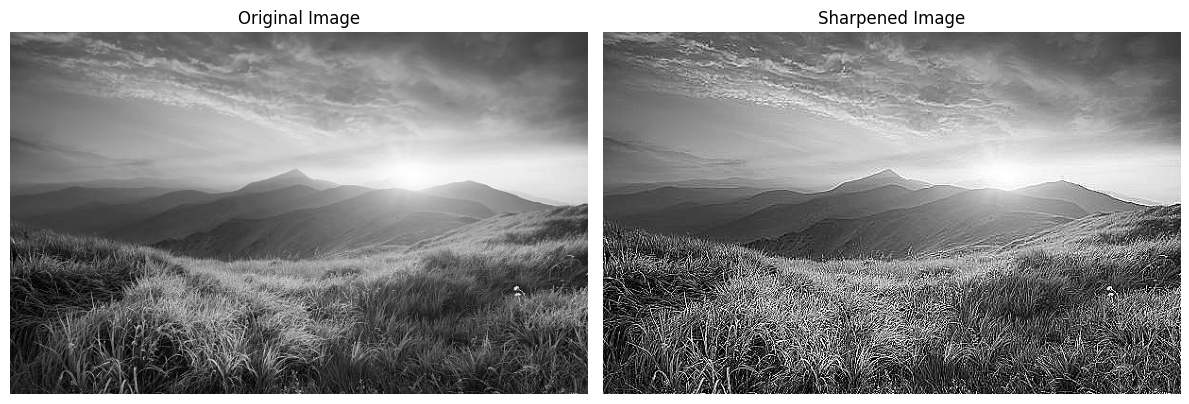

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Define the sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]], dtype=np.float32)

# Apply the sharpening kernel
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

# Display the original and sharpened images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### Unsharp masking

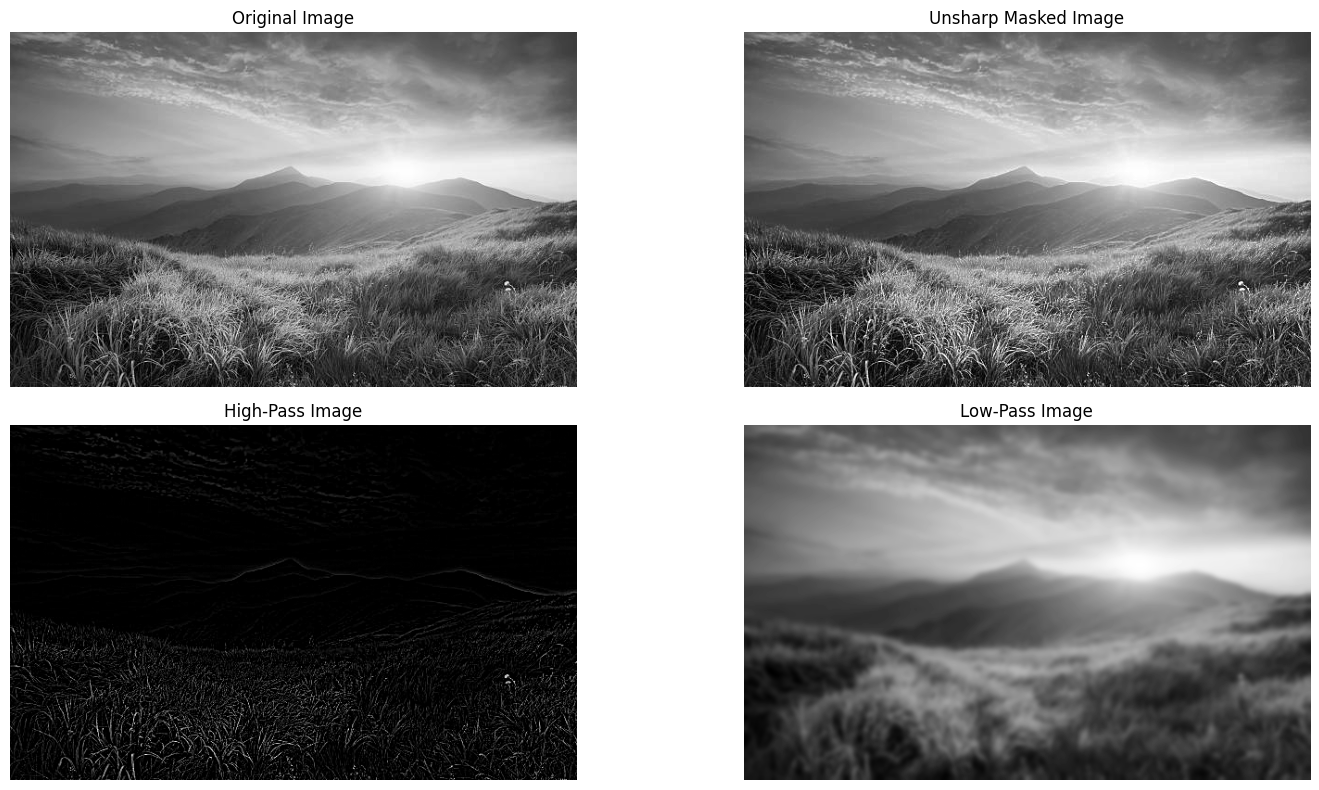

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

k = 0.5
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernel size for the low-pass filter
kernel_size = (15, 15)
low_pass_image = cv2.GaussianBlur(image, kernel_size, 0)
high_pass_image = cv2.subtract(image, low_pass_image) # edges, Calculate the high-pass image (f - f') = fhp

# Calculate the output image 
unsharp_image = cv2.addWeighted(image, 1.0, high_pass_image, k, 0) # (f + k*fhp)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(unsharp_image, cmap='gray')
plt.title('Unsharp Masked Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High-Pass Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low-Pass Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### edge detection (sobel)

C:\Users\salma\AppData\Local\Temp\ipykernel_7848\962314587.py:48: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


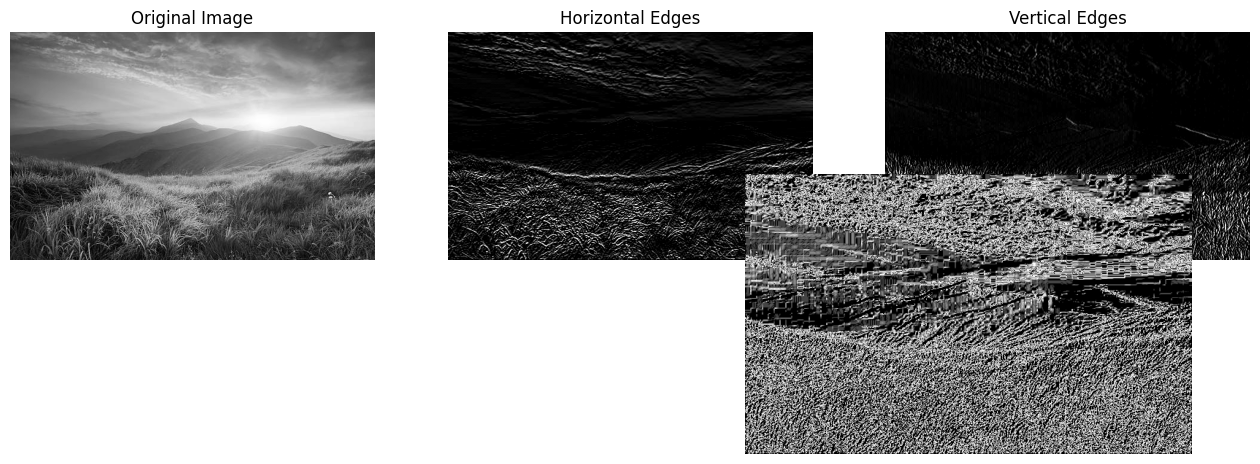

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernels for horizontal and vertical edge detection
sobel_horizontal = np.array([[-1, -2, -1],
                             [ 0,  0,  0],
                             [ 1,  2,  1]], dtype=np.float32)

sobel_vertical = np.array([[-1,  0,  1],
                           [-2,  0,  2],
                           [-1,  0,  1]], dtype=np.float32)

# Apply the Sobel kernels
edges_horizontal = cv2.filter2D(image, -1, sobel_horizontal)
edges_vertical = cv2.filter2D(image, -1, sobel_vertical)

# Combine the horizontal and vertical edges using magnitude
edges_combined = np.sqrt(np.square(edges_horizontal) + np.square(edges_vertical))
# square root
edges_combined = np.uint8(edges_combined) 

# Display the original and edge-detected images
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_horizontal, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_vertical, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_combined, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


### median filter

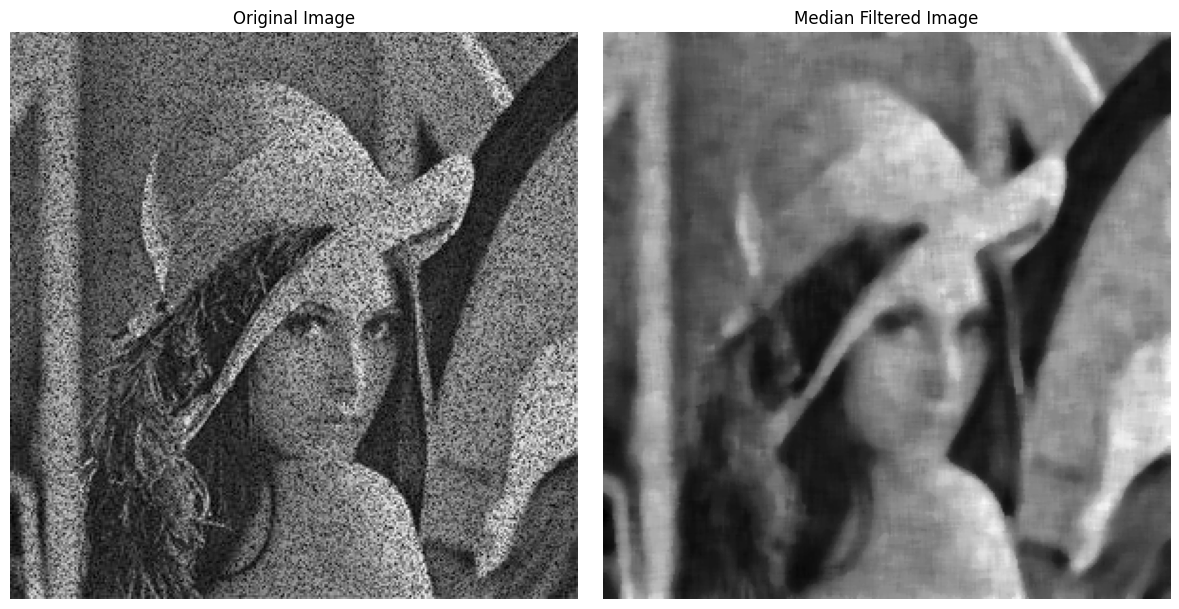

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('noice.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filter
median_filtered_image = cv2.medianBlur(image, 9) 
# try mean filter (blur effect)
# man mad objects
# cartoon img

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# The median filter is effective at removing salt-and-pepper noise while preserving edges.